# Project: Plant Seedlings Classicication.

### Data Description:

- You are provided with a training set and a test set of images of plant seedlings at various stages of grown. 
- Each image has a filename that is its unique id. 
- The dataset comprises 12 plant species.
- The goal of the competition is to create a classifier capable of determining a plant's species from a photo.

### Dataset:
- The project is from a dataset from Kaggle.
- Link to the Kaggle project site:https://www.kaggle.com/c/plant-seedlings-classification/data
- The dataset has to be downloaded from the above Kagglewebsite.

### Context:

- Can you differentiate a weed from a crop seedling?
- The ability to do so effectively can mean better crop yields and better stewardship of the environment.
- The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages.

### Objective:
- To implement the techniques learnt as a part of the course.

### Learning Outcomes:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.

In [1]:
# 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

In [2]:
pip install opencv-python

In [3]:
!pip install tensorflow==2.4.1

In [4]:
pip install keras

In [5]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [6]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np                               # Import numpy
from skimage import data, io                     # Import skimage library (data - Test images and example data.
                                                 #                          io - Reading, saving, and displaying images.) 
import matplotlib.pyplot as plt                  # Import matplotlib.pyplot (Plotting framework in Python.)

import os                                        # This module provides a portable way of using operating system dependent functionality.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [7]:
# Set the path to the dataset folder. (The dataset contains image folder: "train")
from google.colab import drive
drive.mount('/content/drive')
train_path = "/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/train.zip"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Set the path to the dataset folder. (The dataset contains image folder: "train")
#train_path = "/Users/Vicente/Google Drive/Artificial Intelligence and Machine Learning/Computer Vision/Project/train.zip"

C:\Users\Vicente\Google Drive\Artificial Intelligence and Machine Learning\Computer Vision\Project

In [9]:
# Make different folders for train and test data in the current directory of Google Colab notebook. (using mkdir)
!mkdir temp_train

mkdir: cannot create directory ‘temp_train’: File exists


# Unziping train file:

In [10]:
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.)
from zipfile import ZipFile
with ZipFile(train_path, 'r') as zip:
  zip.extractall('./temp_train')

In [11]:
path = "./temp_train/*/*.png"                              # The path to all images in training set. (* means include all folders and files.)
files = glob(path)

In [12]:
trainImg = []                                              # Initialize empty list to store the image data as numbers.
trainLabel = []                                            # Initialize empty list to store the labels of images
j = 1
num = len(files)

# Obtain images and resizing, obtain labels
for img in files:
    '''
    Append the image data to trainImg list.
    Append the labels to trainLabel list.
    '''
    print(str(j) + "/" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (128, 128)))  # Get image (with resizing to 128x128)
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name contains the class to which the image belong)
    j += 1

trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

In [13]:
trainLabel

,0
0,Maize
1,Maize
2,Maize
3,Maize
4,Maize
...,...
4745,Fat Hen
4746,Fat Hen
4747,Fat Hen
4748,Fat Hen


In [14]:
print(trainImg.shape)
print(trainLabel.shape)

(4750, 128, 128, 3)
(4750, 1)


In [15]:
X = trainImg
Y = trainLabel

In [16]:
#label_dict =  {0:'Sugar beet', 1:'Small-flowered Cranesbill', 2:'Shepards Purse', 3:'Scentless Mayweed', 4:'Maize', 5:'Loose Silky-bent', 6:'Fat Hen', 7:'Common wheat', 8:'Common Chickweed', 9:'Cleavers', 10:'Charlock', 11:'Black-grass'}

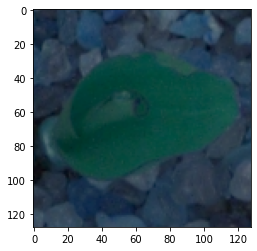

In [17]:
plt.imshow(X[8], cmap='gray')
#print("Label: {}".format(trainLabel[8]))

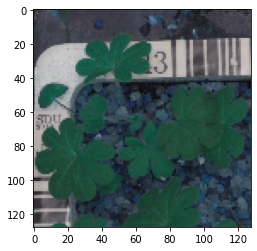

In [18]:
plt.imshow(X[567], cmap='gray')

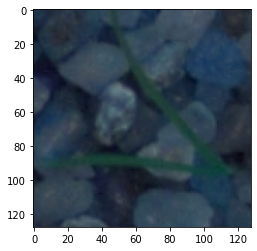

In [19]:
plt.imshow(X[2000], cmap='gray')

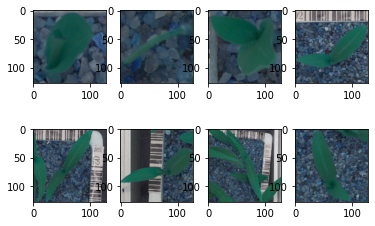

In [20]:
for i in range(8):
    plt.subplot(2, 4, i + 1) 
    plt.imshow(trainImg[i])

# 2. Data Pre-processing: (15 Marks)

### a. Normalization.

In [21]:
X_new = X.astype('float32') / 255.0

In [22]:
clearTrainImg = []
examples = []; getEx = True
for img in X_new:
    blurImg = cv2.GaussianBlur(img, (15, 15), 0)   
clearTrainImg = np.asarray(clearTrainImg)


In [23]:
#clearTrainImg = clearTrainImg / 255

### b. Gaussian Blurring.

In [24]:
import cv2

### c. Visualize data after pre-processing.

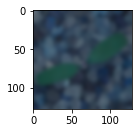

In [25]:
 plt.subplot(2, 3, 2); plt.imshow(blurImg)  


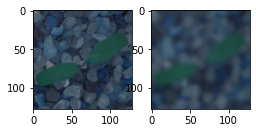

In [26]:
  if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  
       
        getEx = False

#clearTrainImg = np.asarray(clearTrainImg)


# 3. Make data compatible: (10 Marks)

In [27]:
trainLabel[0].unique()


array(['Maize', 'Small-flowered Cranesbill', 'Cleavers', 'Charlock',
       'Loose Silky-bent', 'Common Chickweed', 'Sugar beet',
       'Black-grass', 'Shepherds Purse', 'Scentless Mayweed',
       'Common wheat', 'Fat Hen'], dtype=object)

In [28]:
for key,value in Y.items():
    print("{0} -> {1}".format(key, len(value)))

0 -> 4750


Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


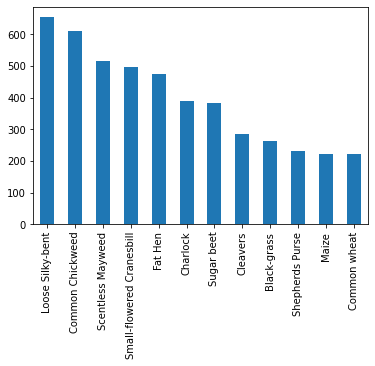

In [29]:
from keras.utils import np_utils
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Encode labels 
le = preprocessing.LabelEncoder()
le.fit(Y[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(Y[0])

# Make categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot
Y[0].value_counts().plot(kind='bar')

### a. Split the dataset into training, testing, and validation set. (Hint: First split train images and train labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)[Read the note at the end of the problem statement for the reason behind using the train images for using for training and testing set.]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 10
epochs = 40
num_predictions = 20

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.3, random_state=1)

In [33]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.5, random_state=1) 

In [34]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (1662, 128, 128, 3)
1662 train samples
1425 test samples


### b. Reshape data into shapes compatible with Keras models.

In [35]:
tf.keras.layers.Reshape(X_new)

In [36]:
 # first layer in model  
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((3, 4), input_shape=(12,)))
model.output_shape == (None, 3, 4), #None is the batch size.  
model.output_shape
(None, 3, 4)

(None, 3, 4)

In [37]:
# intermediate layer in model  
model.add(tf.keras.layers.Reshape((6, 2)))
model.output_shape
(None, 6, 2)

(None, 6, 2)

In [38]:
# supports shape inference 
model.add(tf.keras.layers.Reshape((-1, 2, 2)))
model.output_shape
(None, 3, 2, 2)

(None, 3, 2, 2)

In [39]:
from tensorflow.keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 12)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))

### c. Convert labels from digits to one hot vectors.

In [40]:

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
Y_train = enc.fit_transform(Y_train)
Y_test = enc.fit_transform(Y_test)

In [41]:
print(Y_train.shape)
print(Y_test.shape)

(1662, 12)
(1425, 12)


In [42]:
Y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [43]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
Y = [0, 1, 2, 3]

pd.get_dummies(Y)

,0,1,2,3
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


### d. Print the label for y_train[0].

In [44]:
Y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

# 4. Building CNN: (15 Marks)

### a. Define layers.

In [45]:
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [58]:
# CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(128, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()
#input_shape=X_train.shape[1:]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 128)     9728      
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        204864    
_________________________________________________________________
batch_normalization_9 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)       

### b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [47]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [48]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)       

In [50]:
#X_train = X_train.astype('float32') # Conversion to float type from integer type.
#X_test = X_test.astype('float32')
#X_train /= 255.0 # Division by 255
#X_test /= 255.0

In [51]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

#model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                          # monitor='val_loss',
                                                           #verbose=1,
                                                           #save_best_only=True,
                                                          # save_weights_only=True,
                                                          # mode='auto',
                                                          # period=1)

In [52]:
#X_train = X_train.reshape(X_train.shape[0], 28, 28, 3)
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 3)

#print(X_train.shape)
#print(X_test.shape)

# 5. Fit and evaluate model and print confusion matrix. (10 Marks)

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [60]:

# Compile
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=Y_train, batch_size=32, epochs=10, validation_data=(X_val, Y_val), callbacks=[callback])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 2.4566 - accuracy: 0.2011

ValueError: ignored

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = model.predict(testX)
predYClasses = np.argmax(predY, axis = 1) 
trueY = np.argmax(testY, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = le.classes_) 

# 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

In [ ]:
print(Y_train.shape)
print(Y_test.shape)